# Decision Tree

## Real life applications:
- House pricing prediction.
- Used by Banks to give out loans.
- can be used to do regression tasks and classification tasks.
Decision tree is more of an _if and else_ 

i.e :

age = int(input())

if age > 60:

    dont_give_loan()
    
else:

    give_loan()
    

## Tree structure
- Has root node
- interior node
- leaf node (outcomes/targets) 
- Decisions(edges, what make you choose a particular node)

Give each feature a _gain_ value and the one with highest game value becomes the _root node_

IG = (-P / (P + N)) x log (-P / (P + N))

Gain = IG - Entropy

Entropy = Summation of ((Pi + Ni)/(D + N)) x I[Pi Ni]

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Problem statement
df = pd.read_csv('IceCreamData.csv')

In [3]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [4]:
# Based on temperature of the day, how much revenue will seller get?


In [5]:
# Independent variable is 'temperature' and dependent is 'revenue'
# Decision tree regressor to study the r/shp between the two and predict the revenue
# based on the temperature

### Clean data and do data analysis before prediction

In [6]:
df.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [7]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [9]:
df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

Text(0.5, 1.0, 'Temperature V Revenue')

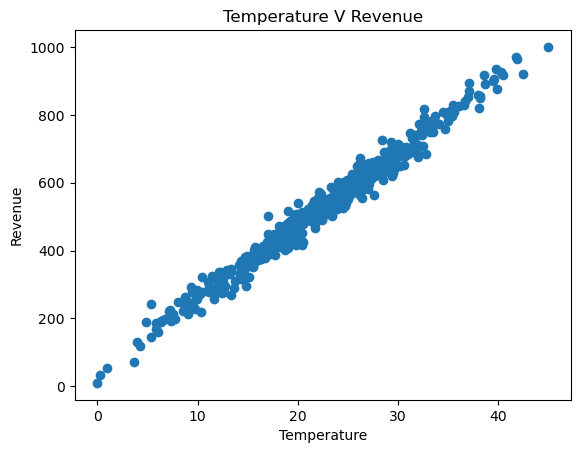

In [10]:
plt.scatter(df.Temperature, df.Revenue)
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.title('Temperature V Revenue')

There is +ve correlation

<AxesSubplot:>

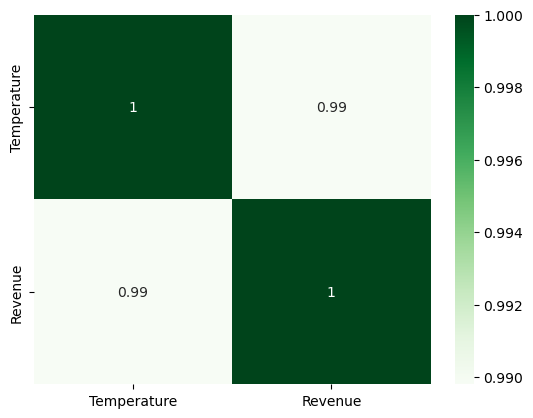

In [11]:
sns.heatmap(df.corr(), annot=True, cmap='Greens')

A very strong positive correlation

As temperature increases, revenue of seller also increases

In [12]:
# box plot to check any outliers
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<AxesSubplot:>

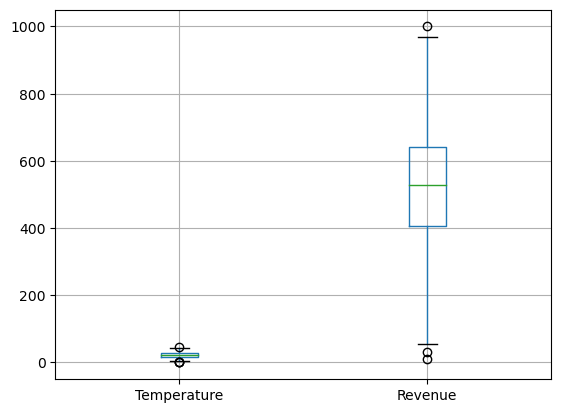

In [13]:
df.boxplot()

<AxesSubplot:>

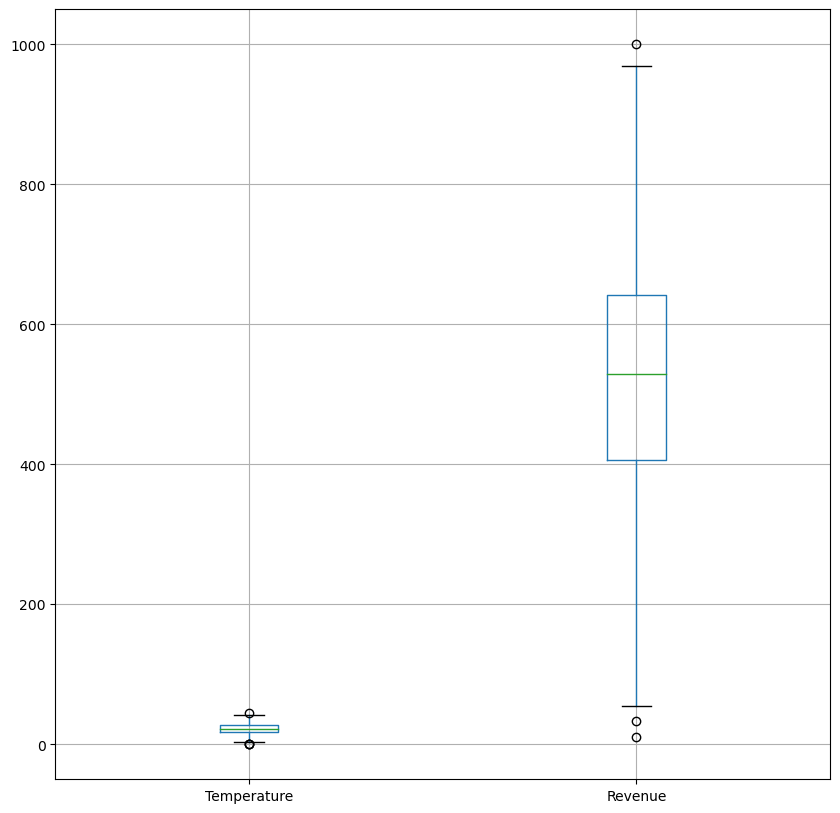

In [14]:
plt.figure(figsize=(10, 10))
df.boxplot()

In [15]:
# Split data into training and testing data

x = np.array(df.Temperature.values)
y = np.array(df.Revenue.values)

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [19]:
len(x_train), len(y_train), len(x_test), len(y_test)

(400, 400, 100, 100)

In [20]:
# Choose the model

In [21]:
regressor = DecisionTreeRegressor()

In [22]:
# train the model
regressor.fit(x_train.reshape(-1, 1),y_train.reshape(-1, 1))

DecisionTreeRegressor()

In [23]:
y_pred = regressor.predict(x_test.reshape(-1, 1))

In [24]:
# compare the y_test with y_predict
comp = pd.DataFrame({"Actual values": y_test.reshape(-1), "Predicted values": y_pred.reshape(-1)})

In [25]:
comp

,Actual values,Predicted values
0,596.889105,563.381633
1,898.805423,905.477604
2,405.661446,402.793174
3,771.789537,797.566536
4,534.622865,530.356713
...,...,...
95,520.392405,550.278516
96,850.246982,819.117588
97,257.078777,316.240194
98,382.073954,372.990606


shows there's no much difference betwen the values, thus *high accuracy*

Text(0, 0.5, 'Y test / Y pred values')

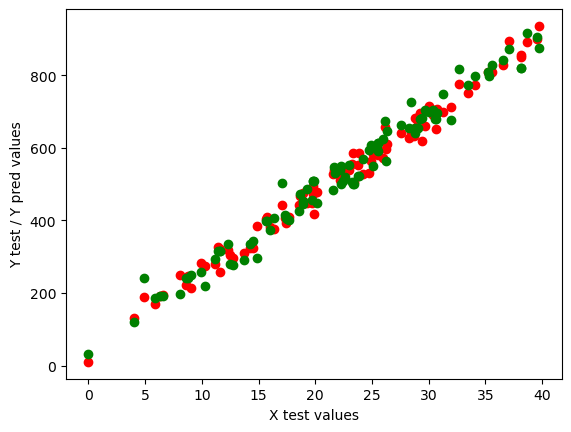

In [27]:
plt.scatter(x_test, y_test, color='red')
plt.scatter(x_test, y_pred, color='green')
plt.xlabel('X test values')
plt.ylabel('Y test / Y pred values')

<AxesSubplot:>

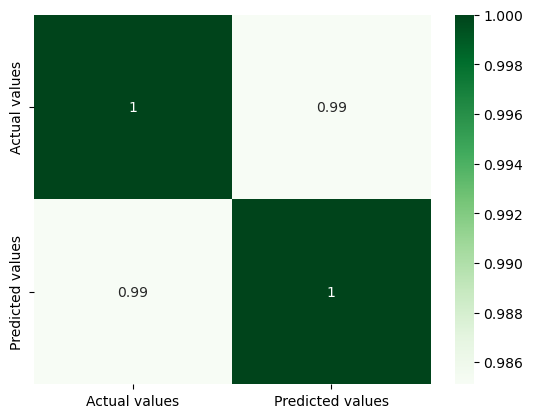

In [28]:
sns.heatmap(comp.corr(), annot=True, cmap='Greens')

Very strong correlation

<AxesSubplot:>

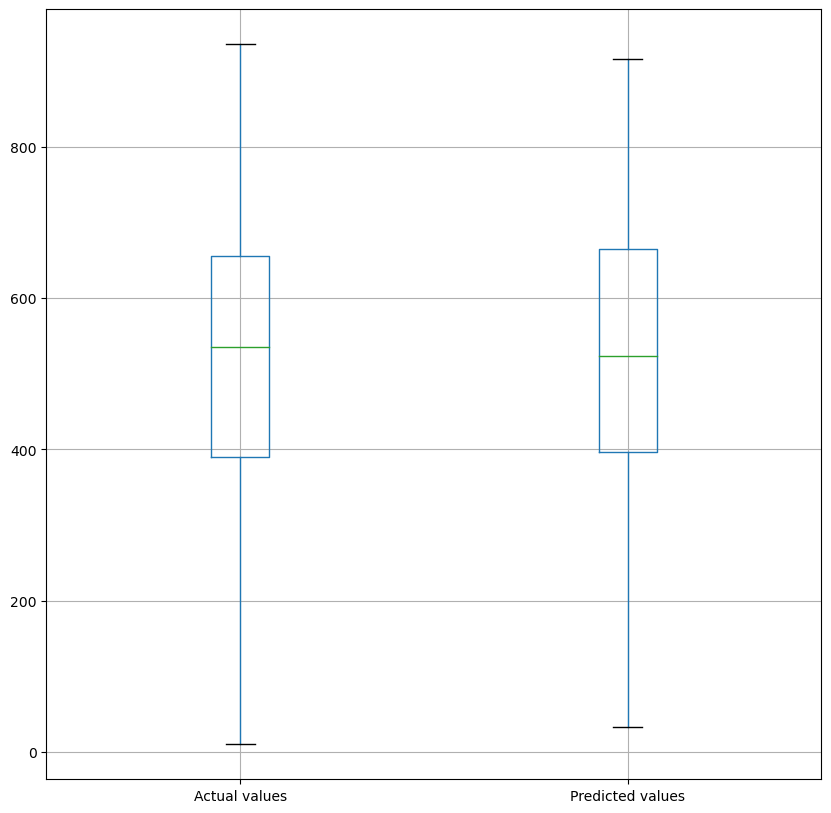

In [29]:
plt.figure(figsize=(10, 10))
comp.boxplot()

no outliers

In [30]:
# perfomance
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

In [31]:
r2_score(y_test, y_pred)

0.9697922605121744

96% accuracy

In [32]:
mean_squared_error(y_test, y_pred)

1149.3150054192174

In [33]:
mean_absolute_error(y_test, y_pred)

27.1116607492

How do you know you chose the right model?_only when you compare with other models and get the highest accuracy_